<a href="https://colab.research.google.com/github/Binu-Getachew/ML-Projects/blob/main/Autoencoder_with_Keras_framework_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important libraries



In [ ]:
pip install keras

  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
Using cached keras-3.12.0-py3-none-any.whl (1.5 MB)


In [ ]:
!pip uninstall keras -y

Found existing installation: keras 3.12.0
Uninstalling keras-3.12.0:
  Successfully uninstalled keras-3.12.0


Loading the data appropriate for keras

In [ ]:
!pip install pydotplus graphviz

Combining Encoder and Decoder to create the Autoencoder

## Visualization

In [67]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from keras.datasets import mnist

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
# Define the Encoder Model using the Functional API
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
encoder = Model(inputs=input_img, outputs=encoded)

In [ ]:
# Define the Decoder Model using the Functional API
encoded_input = Input(shape=(64,))
decoded = Dense(784, activation='sigmoid')(encoded_input)
decoder = Model(inputs=encoded_input, outputs=decoded)

In [ ]:
# Combine Encoder and Decoder to create the Autoencoder using the Functional API
autoencoder = Model(inputs=input_img, outputs=decoder(encoder(input_img)))

In [ ]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the autoencoder
epochs = 5
batch_size = 128
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, x_test))


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0446 - val_loss: 0.0227
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0174 - val_loss: 0.0129
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0109 - val_loss: 0.0087
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0062 - val_loss: 0.0056


In [ ]:
# Get reconstructed images for visualization
decoded_imgs = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Visualize original and reconstructed images

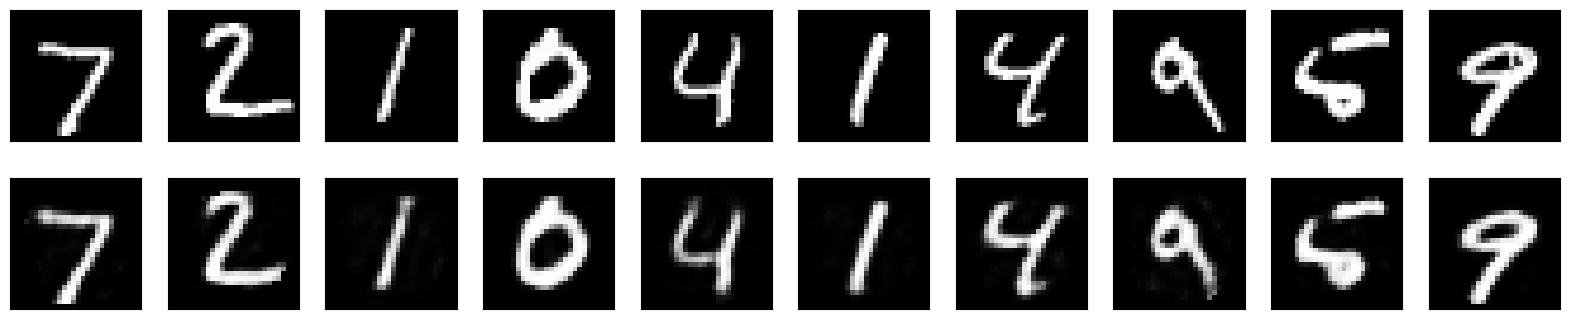

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder = Model(inputs=input_img, outputs=decoder(encoder(input_img)))
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_21 (Functional)      │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_22 (Functional)      │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

dict_keys(['loss', 'val_loss'])


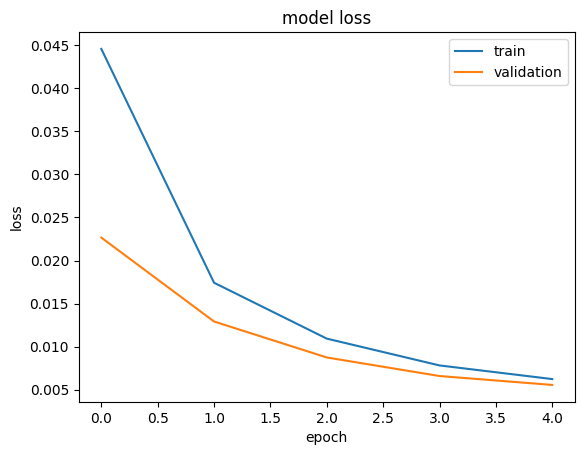

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()